In [1]:
import pandas as pd
dfbg = pd.read_excel(r"BandgapDS.xlsx")
dfbg

,MA,FA,Cs,Rb,Pb,Sn,Br,Cl,I,Bandgap
0,1.000,0.000,0.000,0.00,1.0,0.0,0.00,0.00,1.00,1.550
1,0.000,0.000,1.000,0.00,1.0,0.0,0.00,0.00,1.00,1.800
2,0.000,0.000,1.000,0.00,1.0,0.0,0.33,0.00,0.67,1.910
3,0.000,0.000,1.000,0.00,1.0,0.0,1.00,0.00,0.00,2.300
4,0.500,0.500,0.000,0.00,0.5,0.5,0.00,0.00,1.00,1.250
...,...,...,...,...,...,...,...,...,...,...
814,0.100,0.800,0.050,0.05,1.0,0.0,0.05,0.00,0.95,1.530
815,0.000,0.931,0.049,0.02,1.0,0.0,0.01,0.02,0.97,1.540
816,0.153,0.747,0.050,0.05,1.0,0.0,0.05,0.00,0.95,1.563
817,0.000,0.850,0.100,0.05,1.0,0.0,0.10,0.00,0.90,1.550


In [2]:
col_groupby = dfbg.columns.tolist()
col_groupby.pop()
print(col_groupby)

['MA', 'FA', 'Cs', 'Rb', 'Pb', 'Sn', 'Br', 'Cl', 'I']


In [3]:
dfbg = dfbg.groupby(col_groupby).mean().reset_index()
dfbg

,MA,FA,Cs,Rb,Pb,Sn,Br,Cl,I,Bandgap
0,0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.000,1.000,1.25
1,0.0,0.0,1.0,0.0,0.4,0.6,0.000,0.000,1.000,1.30
2,0.0,0.0,1.0,0.0,0.4,0.6,0.100,0.000,0.900,1.33
3,0.0,0.0,1.0,0.0,0.4,0.6,0.200,0.000,0.800,1.35
4,0.0,0.0,1.0,0.0,0.4,0.6,0.333,0.000,0.667,1.42
...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.0,0.0,0.0,1.0,0.0,0.000,1.000,0.000,3.09
89,1.0,0.0,0.0,0.0,1.0,0.0,0.034,0.016,0.950,1.58
90,1.0,0.0,0.0,0.0,1.0,0.0,0.300,0.000,0.700,1.96
91,1.0,0.0,0.0,0.0,1.0,0.0,0.330,0.000,0.670,1.80


In [4]:
Y = dfbg['Bandgap']
X = dfbg.drop(['Bandgap'],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=611)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_train_hat = rf_regressor.predict(X_train)
y_test_hat = rf_regressor.predict(X_test)

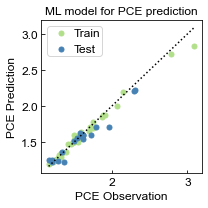

Train r: 0.9934626289600063
Train R2: 0.980769532849976
Train RMSE: 0.03965319925373923
--------------------------------------
Test r: 0.9736723290576587
Test R2: 0.9232750839630445
Test RMSE: 0.08687110302771493


In [6]:
from letsplot import letsplot,get_element_ratio
letsplot(y_train,y_train_hat,y_test,y_test_hat)

In [7]:
Eg_reg = RandomForestRegressor(** {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100})
Eg_reg.fit(X, Y)

RandomForestRegressor(min_samples_split=3)

In [8]:
import pandas as pd
import numpy as np
grouped = pd.read_excel(r'Initialds.xlsx')
result = pd.DataFrame(columns=['Cs', 'MA', 'FA', 'Rb', 'Pb', 'Sn', 'I', 'Br', 'Cl'])
e = {'Cs': np.nan, 'MA':  np.nan, 'FA':  np.nan, 'Rb': np.nan, 'Pb': np.nan, 'Sn':  np.nan, 'I': np.nan, 'Br':  np.nan, 'Cl':  np.nan}
for index,value in enumerate(grouped['Perovskite']):
    try:
        d = get_element_ratio(value)
        result = result.append(d, ignore_index=True)
    except:
        result = result.append(e, ignore_index=True)
        # print(index)
df = pd.concat([grouped, result], axis=1)
df

,Article,Year,ETL,ETL-2,Perovskite,HTL,HTL_additive,Perovskite_deposition_procedure,Perovskite_deposition_method,Antisolvent,...,MACI,Cs,MA,FA,Rb,Pb,Sn,I,Br,Cl
0,Robust Interfacial Modifier for Efficient Pero...,2023,SnO2,no,FA0.9MA0.05Cs0.05Pb(I0.95Br0.05)3,Spiro-OMeTAD,Li+TBP+FK209,one-step,spin 2-3,chlorobenzene,...,NaN,0.050,0.050,0.900,0.0,1.0,0.0,0.95,0.050000,0.0
1,Robust Interfacial Modifier for Efficient Pero...,2023,SnO2,no,FA0.9MA0.05Cs0.05Pb(I0.95Br0.05)3,Spiro-OMeTAD,Li+TBP+FK209,one-step,spin 2-3,chlorobenzene,...,NaN,0.050,0.050,0.900,0.0,1.0,0.0,0.95,0.050000,0.0
2,Towards 26% efficiency in inverted perovskite ...,2023,BCP,C60,Cs0.05(FA0.98MA0.02)0.95PbI3,Me-4PACz,no,one-step,spin 2-3,chlorobenzene,...,0.2,0.050,0.019,0.931,0.0,1.0,0.0,1.00,0.000000,0.0
3,Towards 26% efficiency in inverted perovskite ...,2023,BCP,C60,Cs0.05(FA0.98MA0.02)0.95PbI3,Me-4PACz,no,one-step,spin 2-3,chlorobenzene,...,0.2,0.050,0.019,0.931,0.0,1.0,0.0,1.00,0.000000,0.0
4,Target Therapy for Buried Interface Enables St...,2023,SnO2-FOA,no,FA0.985Cs0.015PbI3,Spiro-OMeTAD/MoO3,Li+TBP,two-step,spin-spin,no,...,small amounts,0.015,0.000,0.985,0.0,1.0,0.0,1.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,"Yoon, Y. et al., Nano Energy, 48, 543–550 (2018)",2018,PCBM,no,MAPbI3,NiOx,0,one-step,spin,diethyl ether,...,NaN,0.000,1.000,0.000,0.0,1.0,0.0,1.00,0.000000,0.0
3020,"Yu, J. C. et al., Sci. Rep. 8, 1070 (2018)",2018,PCBM,ZnO,MAPbI3-xBrx,PEDOT:GO,0,one-step,spin 2-3,chlorobenzene,...,Br,0.000,1.000,0.000,0.0,1.0,0.0,1.00,0.333333,0.0
3021,"Yu, J. C. et al., Sci. Rep. 8, 1070 (2018)",2018,PCBM,ZnO,MAPbI3-xBrx,PEDOT:PSS,0,one-step,spin 2-3,chlorobenzene,...,Br,0.000,1.000,0.000,0.0,1.0,0.0,1.00,0.333333,0.0
3022,"Zhang, J. et al., Adv. Energy Mater., 8, 17019...",2018,PCBM,no,MAPbI3,NiOx,0,one-step,spin,chlorobenzene,...,NaN,0.000,1.000,0.000,0.0,1.0,0.0,1.00,0.000000,0.0


In [9]:
import numpy as np
col_1 = ['MA', 'FA', 'Cs', 'Rb', 'Pb', 'Sn', 'Br', 'Cl', 'I']
X_train_first = df[col_1]
print(X_train_first.isnull().sum())

MA    60
FA    60
Cs    60
Rb    60
Pb    60
Sn    60
Br    60
Cl    60
I     60
dtype: int64


In [10]:
# For the convenience of display here, we simply use 0 to fill in the components that have not been perfectly separated. In fact, this part was manually rechecked and calculated one by one
df = df.fillna(0)
df['Pb'] = pd.to_numeric(df['Pb'], errors='coerce').fillna(0)
X_train_first = df[col_1]
print(X_train_first.isnull().sum())

MA    0
FA    0
Cs    0
Rb    0
Pb    0
Sn    0
Br    0
Cl    0
I     0
dtype: int64


In [11]:
Bandgap_prediction = Eg_reg.predict(X_train_first)
df_new = np.column_stack((df, Bandgap_prediction))
df_new = pd.DataFrame(df_new, columns=df.columns.to_list() + ['Bandgap']) 
df_new

,Article,Year,ETL,ETL-2,Perovskite,HTL,HTL_additive,Perovskite_deposition_procedure,Perovskite_deposition_method,Antisolvent,...,Cs,MA,FA,Rb,Pb,Sn,I,Br,Cl,Bandgap
0,Robust Interfacial Modifier for Efficient Pero...,2023,SnO2,no,FA0.9MA0.05Cs0.05Pb(I0.95Br0.05)3,Spiro-OMeTAD,Li+TBP+FK209,one-step,spin 2-3,chlorobenzene,...,0.05,0.05,0.9,0.0,1.0,0.0,0.95,0.05,0.0,1.518474
1,Robust Interfacial Modifier for Efficient Pero...,2023,SnO2,no,FA0.9MA0.05Cs0.05Pb(I0.95Br0.05)3,Spiro-OMeTAD,Li+TBP+FK209,one-step,spin 2-3,chlorobenzene,...,0.05,0.05,0.9,0.0,1.0,0.0,0.95,0.05,0.0,1.518474
2,Towards 26% efficiency in inverted perovskite ...,2023,BCP,C60,Cs0.05(FA0.98MA0.02)0.95PbI3,Me-4PACz,no,one-step,spin 2-3,chlorobenzene,...,0.05,0.019,0.931,0.0,1.0,0.0,1.0,0.0,0.0,1.526794
3,Towards 26% efficiency in inverted perovskite ...,2023,BCP,C60,Cs0.05(FA0.98MA0.02)0.95PbI3,Me-4PACz,no,one-step,spin 2-3,chlorobenzene,...,0.05,0.019,0.931,0.0,1.0,0.0,1.0,0.0,0.0,1.526794
4,Target Therapy for Buried Interface Enables St...,2023,SnO2-FOA,no,FA0.985Cs0.015PbI3,Spiro-OMeTAD/MoO3,Li+TBP,two-step,spin-spin,no,...,0.015,0.0,0.985,0.0,1.0,0.0,1.0,0.0,0.0,1.511832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,"Yoon, Y. et al., Nano Energy, 48, 543–550 (2018)",2018,PCBM,no,MAPbI3,NiOx,0,one-step,spin,diethyl ether,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.536993
3020,"Yu, J. C. et al., Sci. Rep. 8, 1070 (2018)",2018,PCBM,ZnO,MAPbI3-xBrx,PEDOT:GO,0,one-step,spin 2-3,chlorobenzene,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.0,1.711086
3021,"Yu, J. C. et al., Sci. Rep. 8, 1070 (2018)",2018,PCBM,ZnO,MAPbI3-xBrx,PEDOT:PSS,0,one-step,spin 2-3,chlorobenzene,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.0,1.711086
3022,"Zhang, J. et al., Adv. Energy Mater., 8, 17019...",2018,PCBM,no,MAPbI3,NiOx,0,one-step,spin,chlorobenzene,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.536993
